In [1]:
import numpy as np
import pandas as pd
from random import randrange
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Logistic Regression implementation

In [58]:
class Logistic_Regression():
    
    def __init__(self, learning_rate=0.1, regularization='l2', max_iter=100, reg_coef=0.1):
        
        assert regularization in [None,'l2','l1'], 'regularization not recognize'

        self.learning_rate = learning_rate
        self.regularization = regularization
        self.max_iter = max_iter
        self.reg_coef = reg_coef
        
        self._learned_w = None
        self._learned_b = None
     
    def _initialize(self, x):
        
        rng = np.random.RandomState(0)
        w = rng.normal(0, 0.05, x.shape[1]).reshape(-1,1)
        b = rng.randn()
        return w, b
    
    def _sigmoid(self, x):
        return np.array([self._sigmoid_function(value) for value in x])
        # calculate sigmoid function on x and return the result
        # this function uses the function below!
        
    def _sigmoid_function(self, x):
        if x >= 0:
            z = np.exp(-x)
            return 1 / (1 + z)
        else:
            z = np.exp(x)
            return z / (1 + z)
    
    def _loss(self, x, y, w,b):
        
        
        m = len(y)
        reg_term = 0
        if self.regularization=='l2':
            reg_term = (self.reg_coef/2) * np.sum(w**2)
            # Calculate regularization term
        elif self.regularization=='l1':
            reg_term = (self.reg_coef) * np.sum(abs(w))
            # Calculate regularization term
        z = x@w+b
        # calculate cost
        cost = np.mean ( np.log(1 + np.exp(z)) ) - (1/m)*( y.T @ z )  + reg_term 

        return cost
         
        
    def fit(self, x, y):

        m = x.shape[0]
        w, b = self._initialize(x)
        
        for i in range(self.max_iter):
            
            # Calculate the output of model
            #out = self._sigmoid(x@w+b)

            # Calculate the cost
            cost = self._loss(x,y,w,b)
            
            # Calculate the gradients wirh respect to b and w
            db = (1/m) * b * np.sum( self._sigmoid(x@w+b) - y ) 
            #_______________________________________________________# regularization term derivative
            dr = 0
            if self.regularization=='l2':
                dr = self.reg_coef * w                            
            elif self.regularization=='l1':
                dr = self.reg_coef * np.sign(w)                   
            #__________________________________________________#
            dw = (1/m) * x.T @ (self._sigmoid(x@w+b) - y) + dr
            
            # Update w and b
            w = w - self.learning_rate * dw
            b = b - self.learning_rate * db
            

        if (i+1) % self.max_iter == 0:
                print ("Train Loss after epoch %i: %f" %(i+1, cost))
                
        self._learned_w = w
        self._learned_b = b
        
    def predict(self, x):                                            
        out = self._sigmoid(x @ self._learned_w + self._learned_b)   # some changes have been made here!
        predictions = (out >= 0.5)
        return predictions    
    
    def _cost_after_training(self,x,y):                                   
        prediction = x @ self._learned_w + self._learned_b
        return self._loss(x, y, self._learned_w,self._learned_b)
        

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [15]:
X, y = load_breast_cancer(return_X_y=True)

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
for i in range(X.shape[1]):
    X[:,i] = scaler.fit_transform( X[:,i].reshape(-1,1) ).reshape(-1,)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=15/85, stratify=y_train)

In [20]:
y_train = y_train.reshape(-1,1)
y_val = y_val.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [22]:
LR = Logistic_Regression(learning_rate=0.1, regularization='l2', max_iter=100, reg_coef=0.1)

In [23]:
LR.fit(X_train,y_train)  

Train Loss after epoch 100: 0.197159


In [24]:
y_p_train = LR.predict(X_train)    # predicted labels of training dataset
y_p_test  = LR.predict(X_test)     # predicted labels of testing  dataset

In [25]:
classification_report(y_train>0.5, y_p_train)

'              precision    recall  f1-score   support\n\n       False       0.99      0.95      0.97       148\n        True       0.97      0.99      0.98       249\n\n    accuracy                           0.98       397\n   macro avg       0.98      0.97      0.98       397\nweighted avg       0.98      0.98      0.98       397\n'

In [26]:
classification_report(y_test>0.5, y_p_test)

'              precision    recall  f1-score   support\n\n       False       0.97      0.94      0.95        32\n        True       0.96      0.98      0.97        54\n\n    accuracy                           0.97        86\n   macro avg       0.97      0.96      0.96        86\nweighted avg       0.97      0.97      0.96        86\n'

In [27]:
LR_no_reg = Logistic_Regression(learning_rate=0.001, regularization=None, max_iter=100, reg_coef=1)
LR_l1     = Logistic_Regression(learning_rate=0.001, regularization='l1', max_iter=100, reg_coef=1)
LR_l2     = Logistic_Regression(learning_rate=0.001, regularization='l2', max_iter=100, reg_coef=1)

In [28]:
LR_no_reg.fit(X_train,y_train)            #without regularization term

Train Loss after epoch 100: 0.597299


In [29]:
LR_l1.fit(X_train,y_train)               # with l1 regularization term

Train Loss after epoch 100: 0.734162


In [30]:
LR_l2.fit(X_train,y_train)               # with l2 regularization term

Train Loss after epoch 100: 0.636810


In [31]:
LR._learned_w            [1:5,:].T

array([[-0.27074659, -0.24705427, -0.2216201 , -0.11953996]])

In [32]:
LR_l1._learned_w            [1:5,:].T

array([[ 5.86975478e-06,  2.98413212e-04, -8.69045826e-04,
         1.59453284e-04]])

In [33]:
LR_l2._learned_w            [1:5,:].T

array([[-0.00330832,  0.01011413,  0.06879086,  0.06311193]])

In [34]:
y_p_no_reg = LR_no_reg.predict(X_test)
y_p_l1     = LR_l1    .predict(X_test)
y_p_l2     = LR_l2    .predict(X_test)

In [35]:
print(classification_report(y_test>0.5, y_p_no_reg))   #without regularization term

              precision    recall  f1-score   support

       False       0.83      0.62      0.71        32
        True       0.81      0.93      0.86        54

    accuracy                           0.81        86
   macro avg       0.82      0.78      0.79        86
weighted avg       0.82      0.81      0.81        86



In [36]:
print(classification_report(y_test>0.5, y_p_l1))       # with l1 regularization term

              precision    recall  f1-score   support

       False       1.00      0.09      0.17        32
        True       0.65      1.00      0.79        54

    accuracy                           0.66        86
   macro avg       0.83      0.55      0.48        86
weighted avg       0.78      0.66      0.56        86



In [37]:
print(classification_report(y_test>0.5, y_p_l2))        # with l2 regularization term

              precision    recall  f1-score   support

       False       0.83      0.62      0.71        32
        True       0.81      0.93      0.86        54

    accuracy                           0.81        86
   macro avg       0.82      0.78      0.79        86
weighted avg       0.82      0.81      0.81        86



In [63]:
LR1=Logistic_Regression(learning_rate=0.1,   regularization='l1', max_iter=100, reg_coef=0.5)   # different learning rates
LR2=Logistic_Regression(learning_rate=0.01,  regularization='l1', max_iter=100, reg_coef=0.5)
LR3=Logistic_Regression(learning_rate=0.005, regularization='l1', max_iter=100, reg_coef=0.5)
LR4=Logistic_Regression(learning_rate=0.001, regularization='l1', max_iter=100, reg_coef=0.5)
LR5=Logistic_Regression(learning_rate=0.0005,regularization='l1', max_iter=100, reg_coef=0.5)
LR6=Logistic_Regression(learning_rate=0.0001,regularization='l1', max_iter=100, reg_coef=0.5)
LR7=Logistic_Regression(learning_rate=0.00005,regularization='l1', max_iter=100, reg_coef=0.5)
LR8=Logistic_Regression(learning_rate=0.00001,regularization='l1', max_iter=100, reg_coef=0.5)

In [83]:
LR1.fit(X_train,y_train) 
LR2.fit(X_train,y_train) 
LR3.fit(X_train,y_train) 
LR4.fit(X_train,y_train) 
LR5.fit(X_train,y_train) 
LR6.fit(X_train,y_train) 
LR7.fit(X_train,y_train) 
LR8.fit(X_train,y_train) 

Train Loss after epoch 100: 0.961163
Train Loss after epoch 100: 0.702441
Train Loss after epoch 100: 0.698348
Train Loss after epoch 100: 0.814354
Train Loss after epoch 100: 1.033557
Train Loss after epoch 100: 1.387370
Train Loss after epoch 100: 1.443128
Train Loss after epoch 100: 1.491418


In [84]:
print("LR1 cost on validation set: ",LR1._cost_after_training(X_val,y_val))                   
print("LR2 cost on validation set: ",LR2._cost_after_training(X_val,y_val))
print("LR3 cost on validation set: ",LR3._cost_after_training(X_val,y_val))
print("LR4 cost on validation set: ",LR4._cost_after_training(X_val,y_val))
print("LR5 cost on validation set: ",LR5._cost_after_training(X_val,y_val))
print("LR6 cost on validation set: ",LR6._cost_after_training(X_val,y_val))
print("LR7 cost on validation set: ",LR7._cost_after_training(X_val,y_val))
print("LR8 cost on validation set: ",LR8._cost_after_training(X_val,y_val))

LR1 cost on validation set:  [[0.9931055]]
LR2 cost on validation set:  [[0.70376614]]
LR3 cost on validation set:  [[0.69561354]]
LR4 cost on validation set:  [[0.80996938]]
LR5 cost on validation set:  [[1.03190856]]
LR6 cost on validation set:  [[1.38702353]]
LR7 cost on validation set:  [[1.44287006]]
LR8 cost on validation set:  [[1.49130992]]


In [73]:
LR3_1=Logistic_Regression(learning_rate=0.005, regularization='l1', max_iter=100, reg_coef=0.001)     # different reg_coef
LR3_2=Logistic_Regression(learning_rate=0.005, regularization='l1', max_iter=100, reg_coef=0.005)
LR3_3=Logistic_Regression(learning_rate=0.005, regularization='l1', max_iter=100, reg_coef=0.01)
LR3_4=Logistic_Regression(learning_rate=0.005, regularization='l1', max_iter=100, reg_coef=0.05)
LR3_5=Logistic_Regression(learning_rate=0.005, regularization='l1', max_iter=100, reg_coef=0.1)
LR3_6=Logistic_Regression(learning_rate=0.005, regularization='l1', max_iter=100, reg_coef=0.5)
LR3_7=Logistic_Regression(learning_rate=0.005, regularization='l1', max_iter=100, reg_coef=1)
LR3_8=Logistic_Regression(learning_rate=0.005, regularization='l1', max_iter=100, reg_coef=1.5)

In [85]:
LR3_1.fit(X_train,y_train) 
LR3_2.fit(X_train,y_train) 
LR3_3.fit(X_train,y_train) 
LR3_4.fit(X_train,y_train) 
LR3_5.fit(X_train,y_train) 
LR3_6.fit(X_train,y_train)
LR3_7.fit(X_train,y_train) 
LR3_8.fit(X_train,y_train) 

Train Loss after epoch 100: 0.336996
Train Loss after epoch 100: 0.346473
Train Loss after epoch 100: 0.357930
Train Loss after epoch 100: 0.436085
Train Loss after epoch 100: 0.514268
Train Loss after epoch 100: 0.698348
Train Loss after epoch 100: 0.750406
Train Loss after epoch 100: 0.850378


In [87]:
print("LR3_1 cost on validation set: ",LR3_1._cost_after_training(X_val,y_val))
print("LR3_2 cost on validation set: ",LR3_2._cost_after_training(X_val,y_val))
print("LR3_3 cost on validation set: ",LR3_3._cost_after_training(X_val,y_val))
print("LR3_4 cost on validation set: ",LR3_4._cost_after_training(X_val,y_val))
print("LR3_5 cost on validation set: ",LR3_5._cost_after_training(X_val,y_val))
print("LR3_6 cost on validation set: ",LR3_6._cost_after_training(X_val,y_val))
print("LR3_7 cost on validation set: ",LR3_7._cost_after_training(X_val,y_val))
print("LR3_8 cost on validation set: ",LR3_8._cost_after_training(X_val,y_val))

LR3_1 cost on validation set:  [[0.33490964]]
LR3_2 cost on validation set:  [[0.34434714]]
LR3_3 cost on validation set:  [[0.35576598]]
LR3_4 cost on validation set:  [[0.43431896]]
LR3_5 cost on validation set:  [[0.51374996]]
LR3_6 cost on validation set:  [[0.69561354]]
LR3_7 cost on validation set:  [[0.74565362]]
LR3_8 cost on validation set:  [[0.8411034]]


In [104]:
sklearn_LR = LogisticRegression(C=1000, max_iter=100, penalty='l1', solver='liblinear')  # C is Inverse of regularization strength

In [105]:
sklearn_LR.fit(X_train,y_train.reshape(-1,))

LogisticRegression(C=1000, penalty='l1', solver='liblinear')

In [106]:
y_p_sklearn = sklearn_LR.predict(X_test)
y_p_LR3_1 = LR3_1.predict(X_test)

In [112]:
print(classification_report(y_test , y_p_sklearn.reshape(-1,1)))        # with sklearn Logistic Regression 

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        32
           1       1.00      0.91      0.95        54

    accuracy                           0.94        86
   macro avg       0.93      0.95      0.94        86
weighted avg       0.95      0.94      0.94        86



In [111]:
print(classification_report(y_test>0.5, y_p_LR3_1))                       # with LR3_1 Logistic Regression 

              precision    recall  f1-score   support

       False       0.93      0.88      0.90        32
        True       0.93      0.96      0.95        54

    accuracy                           0.93        86
   macro avg       0.93      0.92      0.92        86
weighted avg       0.93      0.93      0.93        86



## Guassian naive bayes implementation

In [335]:
class GuassianNaiveBayes:
    def fit(self, X, y):
        
        #_____________________________________ separating X dataset rows based on their y labels
        zero_index = list(np.where(y == 0)[0])
        one_index  = list(np.where(y == 1)[0])
        
        X_0= np.take(X, zero_index,axis=0)
        X_1= np.take(X, one_index ,axis=0)
        
        #_____________________________________ Calculating the mean of each feature per class
        self.mean = np.empty((2,X.shape[1]))
        self.mean[0,:] = np.mean(X_0, axis=0).reshape(1,-1)
        self.mean[1,:] = np.mean(X_1, axis=0).reshape(1,-1)
        
        #_____________________________________ Calculating the variance of each feature per class
        self.variance = np.empty((2,X.shape[1]))
        self.variance[0,:]  = np.var(X_0, axis=0).reshape(1,-1)
        self.variance[1,:]  = np.var(X_1, axis=0).reshape(1,-1)

        #_____________________________________ Calculating the prior probability of each class: P(y)
        self.prior = np.empty((2,1))
        self.prior[1,0] = np.count_nonzero(y)/np.size(y)
        self.prior[0,0] = 1 - self.prior[1,0]
        

    def predict(self, X):
        
        pred = np.empty(X.shape[0])
        
        for i in range(X.shape[0]): 
            pred[i] = np.argmax(  self.get_class_probability( X[i] )  )
            
        return pred
    

    def get_class_probability(self, x):         # calculation here has been vectorized! (no iteration)
        
        P_x = self.gaussian_density(x,self.mean,self.variance)
        
        return   self.prior * np.sum( np.log(P_x+1e-20) ,axis=1).reshape(-1,1)   


    def gaussian_density(self, x, mean, var):   # calculation here has been vectorized! (no iteration)
        x = x.reshape(1,-1)
        
        P_x = np.empty((2,x.shape[1]))  # likelihood of x for each class P_x = P(x|y) 
        
        P_x[0,:] = (1/(np.sqrt(2*np.pi*self.variance[0,:])) * np.exp(-0.5*((x-self.mean[0,:])/(self.variance[0,:]))**2 )).reshape(1,-1)
        P_x[1,:] = (1/(np.sqrt(2*np.pi*self.variance[1,:])) * np.exp(-0.5*((x-self.mean[1,:])/(self.variance[1,:]))**2 )).reshape(1,-1)
          
        return P_x

In [342]:
GNB=GuassianNaiveBayes()

In [344]:
GNB.fit(X_train,y_train)

In [345]:
y_p_train = GNB.predict(X_train).reshape(-1,1)      # predicted labels of model for training data
y_p_test = GNB.predict(X_test).reshape(-1,1)        # predicted labels of model for testing  data

In [341]:
from sklearn.naive_bayes import GaussianNB

In [348]:
sklearn_GNB = GaussianNB()

In [350]:
sklearn_GNB.fit(X_train,y_train.reshape(-1,))

GaussianNB()

In [351]:
y_p_sklearn_train = sklearn_GNB.predict(X_train)  # predicted labels of model for training data
y_p_sklearn_test = sklearn_GNB.predict(X_test)    # predicted labels of model for testing  data

In [346]:
print(classification_report(y_train, y_p_train))               # GuassianNaiveBayes

              precision    recall  f1-score   support

           0       0.44      0.99      0.61       148
           1       0.98      0.26      0.41       249

    accuracy                           0.53       397
   macro avg       0.71      0.63      0.51       397
weighted avg       0.78      0.53      0.48       397



In [352]:
print(classification_report(y_train, y_p_sklearn_train))       # sklearn.naive_bayes.GaussianNB

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       148
           1       0.95      0.97      0.96       249

    accuracy                           0.95       397
   macro avg       0.95      0.94      0.94       397
weighted avg       0.95      0.95      0.95       397



In [347]:
print(classification_report(y_test, y_p_test))                 # GuassianNaiveBayes

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        32
           1       1.00      0.19      0.31        54

    accuracy                           0.49        86
   macro avg       0.71      0.59      0.45        86
weighted avg       0.78      0.49      0.42        86



In [353]:
print(classification_report(y_test, y_p_sklearn_test))         # sklearn.naive_bayes.GaussianNB

              precision    recall  f1-score   support

           0       0.96      0.84      0.90        32
           1       0.91      0.98      0.95        54

    accuracy                           0.93        86
   macro avg       0.94      0.91      0.92        86
weighted avg       0.93      0.93      0.93        86



In [368]:
X, y = load_breast_cancer(return_X_y=True)   # loading the dataset
#------------------------------------------
for i in range(X.shape[1]):                  # dataset normalizing

    X[:,i] = scaler.fit_transform( X[:,i].reshape(-1,1) ).reshape(-1,)
#------------------------------------------
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)        # splitting the dataset to train & test 

In [369]:
from sklearn.svm import SVC

### kernel: linear

In [370]:
SVM_linear = SVC(kernel='linear')

In [371]:
SVM_linear.fit(X_train,y_train)

SVC(kernel='linear')

#### train Accuracy

In [372]:
SVM_linear.score(X_train,y_train)     

0.9874371859296482

In [415]:
print(classification_report(y_train, SVM_linear.predict(X_train)))  

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       154
           1       0.98      1.00      0.99       244

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398



#### test Accuracy

In [373]:
SVM_linear.score(X_test,y_test)

0.9707602339181286

In [416]:
print(classification_report(y_test, SVM_linear.predict(X_test)))  

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        58
           1       0.98      0.97      0.98       113

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



### kernel: RBF

In [376]:
SVM_RBF = SVC(kernel='rbf')

In [377]:
SVM_RBF.fit(X_train,y_train)

SVC()

#### train Accuracy

In [378]:
SVM_RBF.score(X_train,y_train)     

0.9874371859296482

In [414]:
print(classification_report(y_train, SVM_RBF.predict(X_train)))  

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       154
           1       0.98      1.00      0.99       244

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398



#### test Accuracy

In [379]:
SVM_RBF.score(X_test,y_test)

0.9649122807017544

In [417]:
print(classification_report(y_test, SVM_RBF.predict(X_test)))  

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        58
           1       0.97      0.97      0.97       113

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



### kernel: polynomial

In [382]:
SVM_poly_5  = SVC(kernel='poly', degree=5 )
SVM_poly_10 = SVC(kernel='poly', degree=10)
SVM_poly_35 = SVC(kernel='poly', degree=35)

In [383]:
SVM_poly_5.fit(X_train,y_train)

SVC(degree=5, kernel='poly')

In [384]:
SVM_poly_10.fit(X_train,y_train)

SVC(degree=10, kernel='poly')

In [385]:
SVM_poly_35.fit(X_train,y_train)

SVC(degree=35, kernel='poly')

#### train Accuracy

In [386]:
SVM_poly_5.score(X_train,y_train)                                             # degree=5

0.8517587939698492

In [411]:
print(classification_report(y_train, SVM_poly_5.predict(X_train)))  

              precision    recall  f1-score   support

           0       1.00      0.62      0.76       154
           1       0.81      1.00      0.89       244

    accuracy                           0.85       398
   macro avg       0.90      0.81      0.83       398
weighted avg       0.88      0.85      0.84       398



In [387]:
SVM_poly_10.score(X_train,y_train)                                           # degree=10

0.8165829145728644

In [412]:
print(classification_report(y_train, SVM_poly_10.predict(X_train)))  

              precision    recall  f1-score   support

           0       1.00      0.53      0.69       154
           1       0.77      1.00      0.87       244

    accuracy                           0.82       398
   macro avg       0.88      0.76      0.78       398
weighted avg       0.86      0.82      0.80       398



In [388]:
SVM_poly_35.score(X_train,y_train)                                         # degree=35

0.8065326633165829

In [413]:
print(classification_report(y_train, SVM_poly_35.predict(X_train)))  

              precision    recall  f1-score   support

           0       1.00      0.50      0.67       154
           1       0.76      1.00      0.86       244

    accuracy                           0.81       398
   macro avg       0.88      0.75      0.77       398
weighted avg       0.85      0.81      0.79       398



#### test Accuracy

In [389]:
SVM_poly_5.score(X_test,y_test)                                                 # degree=5

0.8187134502923976

In [420]:
print(classification_report(y_test, SVM_poly_5.predict(X_test)))  

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        58
           1       0.78      1.00      0.88       113

    accuracy                           0.82       171
   macro avg       0.89      0.73      0.76       171
weighted avg       0.86      0.82      0.80       171



In [390]:
SVM_poly_10.score(X_test,y_test)                                                 # degree=10

0.7426900584795322

In [419]:
print(classification_report(y_test, SVM_poly_10.predict(X_test)))  

              precision    recall  f1-score   support

           0       0.85      0.29      0.44        58
           1       0.73      0.97      0.83       113

    accuracy                           0.74       171
   macro avg       0.79      0.63      0.63       171
weighted avg       0.77      0.74      0.70       171



In [391]:
SVM_poly_35.score(X_test,y_test)                                                # degree=35

0.7368421052631579

In [418]:
print(classification_report(y_test, SVM_poly_35.predict(X_test)))  

              precision    recall  f1-score   support

           0       0.93      0.24      0.38        58
           1       0.72      0.99      0.83       113

    accuracy                           0.74       171
   macro avg       0.83      0.62      0.61       171
weighted avg       0.79      0.74      0.68       171



In [392]:
SVM_RBF_1 = SVC(kernel='rbf', C=0.1)
SVM_RBF_2 = SVC(kernel='rbf', C=1  )
SVM_RBF_3 = SVC(kernel='rbf', C=10 )

In [393]:
SVM_RBF_1.fit(X_train,y_train)

SVC(C=0.1)

In [394]:
SVM_RBF_2.fit(X_train,y_train)

SVC(C=1)

In [395]:
SVM_RBF_3.fit(X_train,y_train)

SVC(C=10)

#### train Accuracy

In [396]:
SVM_RBF_1.score(X_train,y_train)                                    # C=0.1 

0.949748743718593

In [408]:
print(classification_report(y_train, SVM_RBF_1.predict(X_train)))  

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       154
           1       0.94      0.98      0.96       244

    accuracy                           0.95       398
   macro avg       0.95      0.94      0.95       398
weighted avg       0.95      0.95      0.95       398



In [397]:
SVM_RBF_2.score(X_train,y_train)                                   # C=1

0.9874371859296482

In [409]:
print(classification_report(y_train, SVM_RBF_2.predict(X_train)))  

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       154
           1       0.98      1.00      0.99       244

    accuracy                           0.99       398
   macro avg       0.99      0.98      0.99       398
weighted avg       0.99      0.99      0.99       398



In [398]:
SVM_RBF_3.score(X_train,y_train)                                   # C=10

0.9899497487437185

In [410]:
print(classification_report(y_train, SVM_RBF_3.predict(X_train)))  

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       154
           1       0.98      1.00      0.99       244

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



#### test Accuracy

In [399]:
SVM_RBF_1.score(X_test,y_test)                                    # C=0.1 

0.935672514619883

In [401]:
SVM_RBF_2.score(X_test,y_test)                                    # C=1

0.9649122807017544

In [402]:
SVM_RBF_3.score(X_test,y_test)                                    # C=10

0.9707602339181286

In [421]:
from sklearn.linear_model import SGDClassifier

In [422]:
SGD = SGDClassifier(loss="hinge", max_iter=100)

In [423]:
SGD.fit(X_train,y_train)

SGDClassifier(max_iter=100)

#### train Accuracy

In [425]:
SGD.score(X_train,y_train)                                   # SGD    accuracy on train data

0.9824120603015075

In [427]:
print(classification_report(y_train, SGD.predict(X_train)))  

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       154
           1       0.98      1.00      0.99       244

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



#### tets Accuracy

In [424]:
SGD.score(X_test,y_test)                                     # SGD     accuracy on test data

0.9649122807017544

In [426]:
print(classification_report(y_test, SGD.predict(X_test)))  

              precision    recall  f1-score   support

           0       0.96      0.93      0.95        58
           1       0.97      0.98      0.97       113

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



## Decision Tree

In [4]:
## Preprocessing steps
train = pd.read_csv("titanic.csv")

train.pop('Cabin')
train.pop('Name')
train.pop('Ticket')
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train['Pclass'] = train['Pclass'].apply(str)

# Onehot encoding categorical features
for col in train.dtypes[train.dtypes == 'object'].index:
    for_dummy = train.pop(col)
    train = pd.concat([train, pd.get_dummies(for_dummy, prefix=col)], axis=1)

labels = train.pop('Survived')
x_train, x_test, y_train, y_test = train_test_split(train, labels, test_size=0.25)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
DT_list = []                                   # list for classifiers with differet max_depth

for i in range(21):
    DT_list.append( DecisionTreeClassifier(max_depth=i+5, random_state=0) )

In [15]:
for i in range(len(DT_list)):                  # fitting all the models in the list on training dataset
    DT_list[i].fit(x_train,y_train)

### test Accuracy

In [19]:
for i in range(len(DT_list)):                  # calculating and printing the accuracy of each model on test dataset
    score = DT_list[i].score(x_test,y_test)
    print(f'Decision Tree with max_depth={i+5} Accuracy on test data: {score}')

Decision Tree with max_depth=5 Accuracy on test data: 0.7488789237668162
Decision Tree with max_depth=6 Accuracy on test data: 0.7757847533632287
Decision Tree with max_depth=7 Accuracy on test data: 0.7533632286995515
Decision Tree with max_depth=8 Accuracy on test data: 0.7488789237668162
Decision Tree with max_depth=9 Accuracy on test data: 0.7399103139013453
Decision Tree with max_depth=10 Accuracy on test data: 0.7488789237668162
Decision Tree with max_depth=11 Accuracy on test data: 0.7174887892376681
Decision Tree with max_depth=12 Accuracy on test data: 0.726457399103139
Decision Tree with max_depth=13 Accuracy on test data: 0.7130044843049327
Decision Tree with max_depth=14 Accuracy on test data: 0.7399103139013453
Decision Tree with max_depth=15 Accuracy on test data: 0.7085201793721974
Decision Tree with max_depth=16 Accuracy on test data: 0.7130044843049327
Decision Tree with max_depth=17 Accuracy on test data: 0.7219730941704036
Decision Tree with max_depth=18 Accuracy on 

In [26]:
DT_list = []                                   # list for classifiers with differet min_samples_split

for i in range(9):
    DT_list.append( DecisionTreeClassifier(max_depth=15, min_samples_split=i+2 ,random_state=0) )

In [27]:
for i in range(len(DT_list)):                  # fitting all the models in the list on training dataset
    DT_list[i].fit(x_train,y_train)

### train Accuracy

In [29]:
for i in range(len(DT_list)):                  # calculating and printing the accuracy of each model on train dataset
    score = DT_list[i].score(x_train,y_train)
    print(f'Decision Tree with max_depth=15 and min_samples_split={i+2}  Accuracy on tarin data: {score}')

Decision Tree with max_depth=15 and min_samples_split=2  Accuracy on tarin data: 0.9985029940119761
Decision Tree with max_depth=15 and min_samples_split=3  Accuracy on tarin data: 0.9880239520958084
Decision Tree with max_depth=15 and min_samples_split=4  Accuracy on tarin data: 0.9715568862275449
Decision Tree with max_depth=15 and min_samples_split=5  Accuracy on tarin data: 0.9610778443113772
Decision Tree with max_depth=15 and min_samples_split=6  Accuracy on tarin data: 0.9535928143712575
Decision Tree with max_depth=15 and min_samples_split=7  Accuracy on tarin data: 0.9461077844311377
Decision Tree with max_depth=15 and min_samples_split=8  Accuracy on tarin data: 0.9431137724550899
Decision Tree with max_depth=15 and min_samples_split=9  Accuracy on tarin data: 0.9281437125748503
Decision Tree with max_depth=15 and min_samples_split=10  Accuracy on tarin data: 0.9236526946107785


### test Accuracy

In [28]:
for i in range(len(DT_list)):                  # calculating and printing the accuracy of each model on test dataset
    score = DT_list[i].score(x_test,y_test)
    print(f'Decision Tree with max_depth=15 and min_samples_split={i+2}  Accuracy on test data: {score}')

Decision Tree with max_depth=15 and min_samples_split=2  Accuracy on test data: 0.7085201793721974
Decision Tree with max_depth=15 and min_samples_split=3  Accuracy on test data: 0.7130044843049327
Decision Tree with max_depth=15 and min_samples_split=4  Accuracy on test data: 0.7085201793721974
Decision Tree with max_depth=15 and min_samples_split=5  Accuracy on test data: 0.726457399103139
Decision Tree with max_depth=15 and min_samples_split=6  Accuracy on test data: 0.726457399103139
Decision Tree with max_depth=15 and min_samples_split=7  Accuracy on test data: 0.7488789237668162
Decision Tree with max_depth=15 and min_samples_split=8  Accuracy on test data: 0.7399103139013453
Decision Tree with max_depth=15 and min_samples_split=9  Accuracy on test data: 0.7488789237668162
Decision Tree with max_depth=15 and min_samples_split=10  Accuracy on test data: 0.7443946188340808


In [31]:
DT_gini    = DecisionTreeClassifier(max_depth=15, min_samples_split=5, criterion='gini'    ,random_state=0)
DT_entropy = DecisionTreeClassifier(max_depth=15, min_samples_split=5, criterion='entropy' ,random_state=0)

In [32]:
DT_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=5, random_state=0)

In [33]:
DT_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       random_state=0)

### train Accuracy

In [35]:
DT_gini.score(x_train,y_train)                    # criterion='gini'

0.9610778443113772

In [36]:
DT_entropy.score(x_train,y_train)                 # criterion='entropy'

0.9640718562874252

### test Accuracy

In [34]:
DT_gini.score(x_test,y_test)                     # criterion='gini'

0.726457399103139

In [37]:
DT_entropy.score(x_test,y_test)                  # criterion='entropy'

0.7309417040358744

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [48]:
DT_entropy = DecisionTreeClassifier( max_depth=15, min_samples_split=5, criterion='entropy' ,random_state=0 ) 

In [49]:
DT_entropy = DT_entropy.fit(x_train,y_train)

In [71]:
fn = x_train.columns
cn=['not_survived', 'survived']

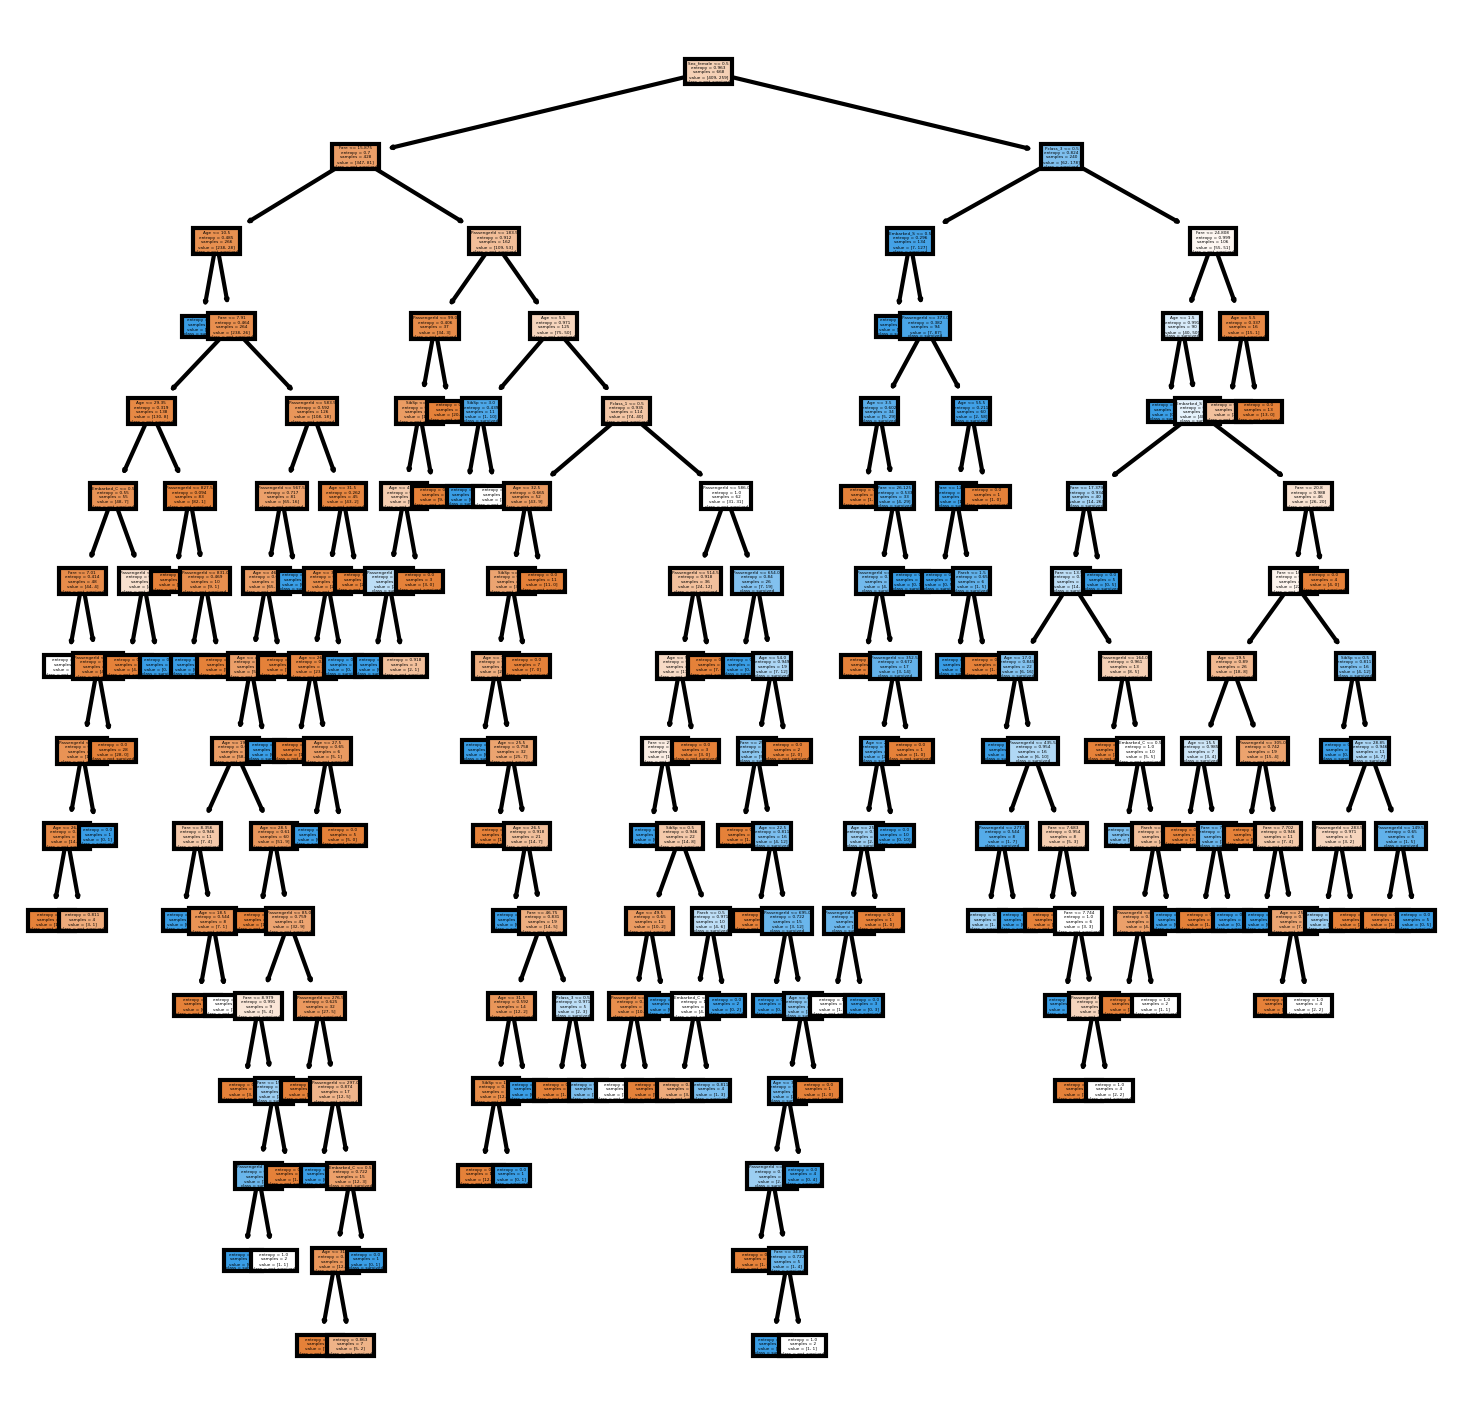

In [75]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)

tree.plot_tree(DT_entropy,
               feature_names = fn, 
               class_names=cn,
               filled = True);fig.savefig('decision_tree.png')